In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [4]:
train_df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train_df.isnull().sum()

patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [7]:
train_df.patient_race.value_counts()

White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: patient_race, dtype: int64

In [8]:
train_df['patient_race'].fillna('not_given', inplace=True)

In [9]:
train_df['payer_type'].value_counts()

COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: payer_type, dtype: int64

In [10]:
train_df['payer_type'].fillna('none_given', inplace=True)
train_df['Region'].fillna('none_given', inplace=True)
train_df['Division'].fillna('none_given', inplace=True)

In [11]:
train_df['patient_state'].value_counts()

CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: patient_state, dtype: int64

In [12]:
max_state = train_df['patient_state'].mode()[0]
train_df['patient_state'].fillna(max_state, inplace=True)

In [13]:
median_bmi = train_df['bmi'].median()
train_df['bmi'].fillna(median_bmi, inplace=True)

In [14]:
medians = train_df.median()
train_df.fillna(medians, inplace=True)

/tmp/ipykernel_6307/3727644490.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = train_df.median()


In [15]:
train_df['metastatic_first_novel_treatment'].value_counts()

PEMBROLIZUMAB    13
OLAPARIB         11
Name: metastatic_first_novel_treatment, dtype: int64

In [16]:
train_df['metastatic_first_novel_treatment_type'].value_counts()

Antineoplastics    24
Name: metastatic_first_novel_treatment_type, dtype: int64

In [17]:
train_df['DiagPeriodL90D'].value_counts()

1    8060
0    4846
Name: DiagPeriodL90D, dtype: int64

In [18]:
train_df.drop(columns=['patient_gender'], inplace=True)
test_df.drop(columns=['patient_gender'], inplace=True)

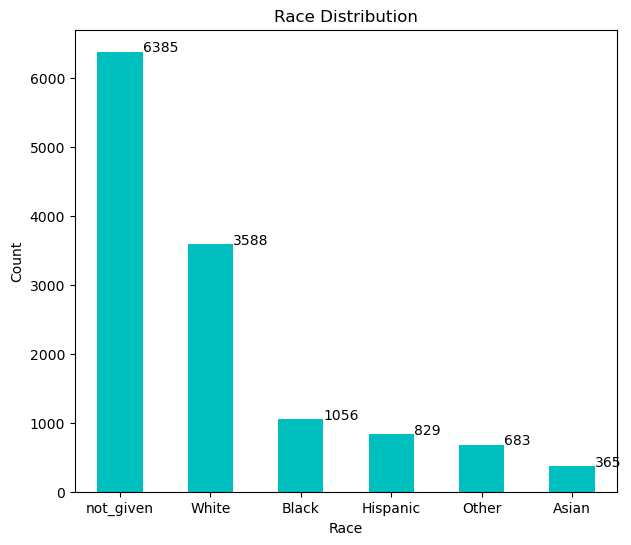

In [19]:
race = train_df['patient_race'].value_counts()
plt.figure(figsize=(7, 6))
ax = race.plot(kind='bar', rot=0, color='c')
ax.set_title('Race Distribution')
ax.set_xlabel('Race')
ax.set_ylabel('Count')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value))
    
plt.show()

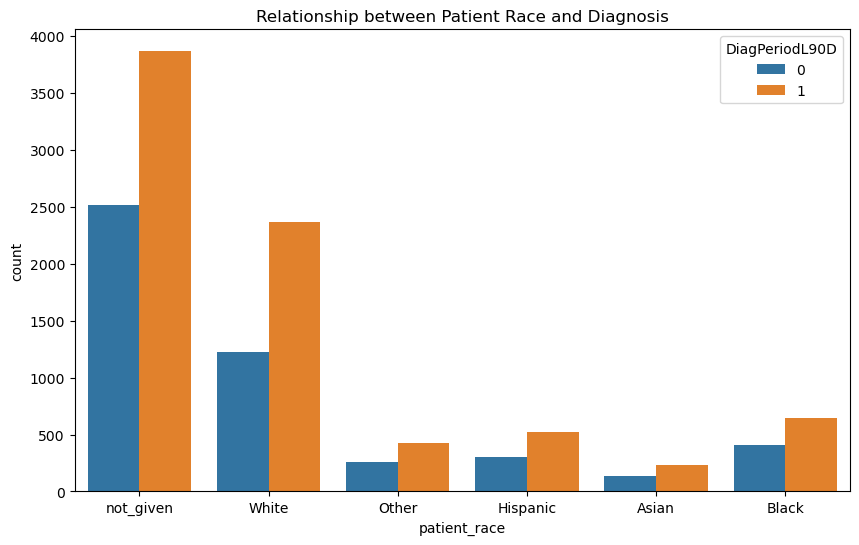

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='patient_race', hue='DiagPeriodL90D', data=train_df)
plt.title('Relationship between Patient Race and Diagnosis')
plt.show()

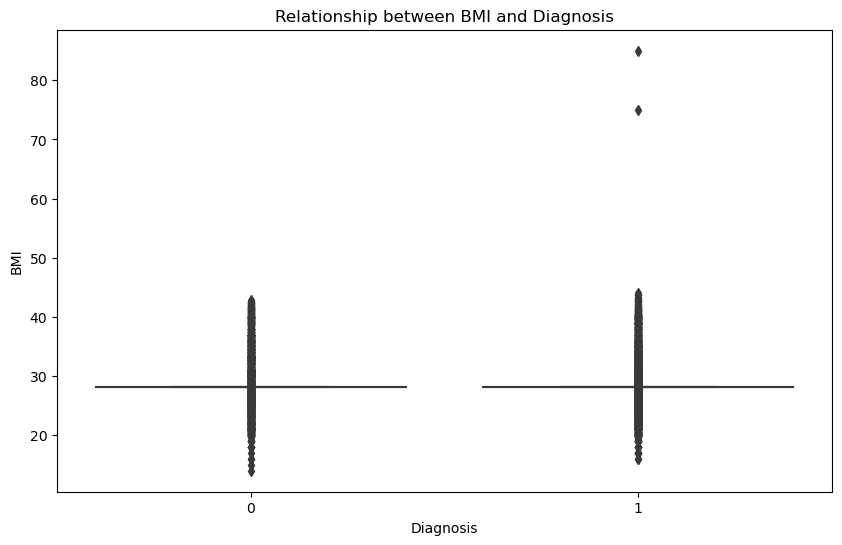

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DiagPeriodL90D', y='bmi', data=train_df, palette='viridis')
plt.title('Relationship between BMI and Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

In [22]:
train_df.dtypes

patient_id                                 int64
patient_race                              object
payer_type                                object
patient_state                             object
patient_zip3                               int64
patient_age                                int64
bmi                                      float64
breast_cancer_diagnosis_code              object
breast_cancer_diagnosis_desc              object
metastatic_cancer_diagnosis_code          object
metastatic_first_novel_treatment          object
metastatic_first_novel_treatment_type     object
Region                                    object
Division                                  object
population                               float64
density                                  float64
age_median                               float64
age_under_10                             float64
age_10_to_19                             float64
age_20s                                  float64
age_30s             

In [23]:
train_df['metastatic_first_novel_treatment_type'].value_counts()

Antineoplastics    24
Name: metastatic_first_novel_treatment_type, dtype: int64

In [24]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [25]:
train_df['breast_cancer_diagnosis_desc'] = train_df['breast_cancer_diagnosis_desc'].apply(lambda x: nlp(x).vector)

In [26]:
test_df['breast_cancer_diagnosis_desc'] = test_df['breast_cancer_diagnosis_desc'].apply(lambda x: nlp(x).vector)

In [27]:
train_df['breast_cancer_diagnosis_desc']

0        [-2.1857245, -1.499248, -0.06484781, 0.8663789...
1        [-3.1930542, 0.059765514, -1.285679, 3.0578089...
2        [-3.2976353, -0.5322255, -1.5312644, 1.9199702...
3        [-2.7909133, 0.33778822, -1.4030054, 3.0241168...
4        [-3.7947798, -2.8656478, 2.047403, 1.2504234, ...
5        [-3.7947798, -2.8656478, 2.047403, 1.2504234, ...
6        [-1.9969578, -0.90365875, -0.08969781, 1.02054...
7        [-3.2359045, 0.11579729, -1.3362418, 2.9727988...
8        [-3.6656818, -0.12342296, -1.3287009, 3.227733...
9        [-1.9969578, -0.90365875, -0.08969781, 1.02054...
10       [-3.1247225, 0.27641553, -1.0901781, 3.0718443...
11       [-3.7947798, -2.8656478, 2.047403, 1.2504234, ...
12       [-2.1105578, -0.49622217, -0.6831311, 1.425981...
13       [-3.7947798, -2.8656478, 2.047403, 1.2504234, ...
14       [-1.7147021, -1.2234701, -0.54727006, 0.961203...
15       [-3.1930542, 0.059765514, -1.285679, 3.0578089...
16       [-3.7947798, -2.8656478, 2.047403, 1.2504234, .

In [28]:
train_df.drop(columns=['breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_zip3'], inplace=True)
test_df.drop(columns=['breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_zip3'], inplace=True)

In [29]:
train_df['Division'].value_counts()

East North Central    2923
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
none_given              52
New England              5
Name: Division, dtype: int64

In [30]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['patient_race'], prefix='patient_race')], axis=1)

# Drop the original 'patient_race' column
train_df.drop(columns=['patient_race'], inplace=True)

In [31]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['patient_race'], prefix='patient_race')], axis=1)
test_df.drop(columns=['patient_race'], inplace=True)

In [32]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['payer_type'], prefix='payer_type')], axis=1)
train_df.drop(columns=['payer_type'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['payer_type'], prefix='payer_type')], axis=1)
test_df.drop(columns=['payer_type'], inplace=True)

train_df = pd.concat([train_df, pd.get_dummies(train_df['patient_state'], prefix='patient_state')], axis=1)
train_df.drop(columns=['patient_state'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['patient_state'], prefix='patient_state')], axis=1)
test_df.drop(columns=['patient_state'], inplace=True)

train_df = pd.concat([train_df, pd.get_dummies(train_df['Division'], prefix='Division')], axis=1)
train_df.drop(columns=['Division'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['Division'], prefix='Division')], axis=1)
test_df.drop(columns=['Division'], inplace=True)

train_df = pd.concat([train_df, pd.get_dummies(train_df['Region'], prefix='Region')], axis=1)
train_df.drop(columns=['Region'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['Region'], prefix='Region')], axis=1)
test_df.drop(columns=['Region'], inplace=True)

In [33]:
# train_df['breast_cancer_diagnosis_desc'] = np.stack(train_df['breast_cancer_diagnosis_desc'])
# test_df['breast_cancer_diagnosis_desc'] = np.stack(test_df['breast_cancer_diagnosis_desc'])

In [34]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train_desc = np.vstack(train_df['breast_cancer_diagnosis_desc'])

# # Fit and transform the scaler on the reshaped data
# train_df['breast_cancer_diagnosis_desc'] = scaler.fit_transform(X_train_desc)

# # Now, similarly transform the test data
# # Assuming test_df is your test DataFrame
# X_test_desc = np.vstack(test_df['breast_cancer_diagnosis_desc'])
# test_df['breast_cancer_diagnosis_desc'] = scaler.transform(X_test_desc)

In [35]:
y = train_df['DiagPeriodL90D']
X = train_df.drop(columns =['DiagPeriodL90D'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.56      0.45      1460
           1       0.62      0.44      0.52      2412

    accuracy                           0.49      3872
   macro avg       0.50      0.50      0.48      3872
weighted avg       0.53      0.49      0.49      3872



In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37      1460
           1       0.64      0.73      0.68      2412

    accuracy                           0.58      3872
   macro avg       0.53      0.53      0.53      3872
weighted avg       0.56      0.58      0.56      3872

